### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from scipy import stats
import pickle

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn

### Import Dataset

In [2]:
df= pd.read_csv('train_E6oV3lV.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
df.sample(30)

,id,label,tweet
15854,15855,1,are you #hispanic &amp; feel â¦ the are stomping on you? listen #retweet #boricua #miamiâ¦
2526,2527,0,@user bihday to you! may your bihday be as awesome as you are!
9102,9103,0,i just went looking through my old tweets and i really miss my @user fam ðð
21417,21418,0,"#parenting an , #anxious or over-the-top kid? get help! #bloomparenting"
29085,29086,0,"exactly! under fbi investigation, should not be able to run for the office of the potus! #joke #deletehillary"
17811,17812,0,all i wanted to be doing right now was getting drunk at nappers but im in bed
14801,14802,0,@user @user @user great poster printed for our stand v5 designed by @user printed by @user
30485,30486,0,sooo to have god in my life...i feel his unwavering &amp; unconditional love every single day!!! #godsavedme
28301,28302,0,i'm tired... but happy !! it's friday â¥â¥â¥ #selfie #friday #tired @ puea de las mitras
31077,31078,0,cow many days before touga boulevard plays genk on stage???


In [4]:
df.index=df["id"]
df.drop('id', axis=1, inplace=True)
df.sample(5)

,label,tweet
id,,
7116,0,happy bihday donald trump!!! #blessed #makeamericagreatagain ðð
18375,0,driving 48 miles to try @user tomorrow. #maybestupid
23200,0,pre-order the #newep #goodmusic ðð¾ðð¾ðð¾ ðð¾
989,0,@user awlrite mol? jealous? better than being at cricket pitch all my life #getalife
15376,0,#officeselfie #ciprexcel ð¾ð¾ð¾ @ city university london


### Data Analysis

In [5]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 2


In [6]:
#  Check the Missing Value
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [8]:
# Extracting the Target Attribute for Each Class and Visualize
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


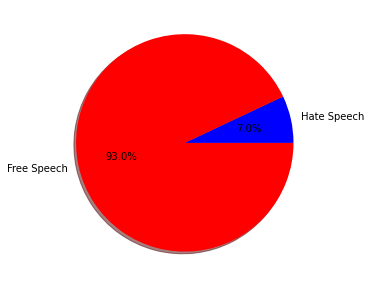

In [9]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.figure(figsize=(5, 5))
plt.pie(speech, labels = label, shadow = True, autopct = '%1.1f%%', colors=['blue', 'red'])
plt.style.use('fivethirtyeight')
plt.show()

### Add features

In [10]:
# Number of characters in the text
df['tweet_length'] = df['tweet'].apply(len)

# Number of words in the text
df['tweet_num_words'] = df['tweet'].apply(lambda x: len(x.split()))

# Average length of the words in the text
df["mean_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Number of non-stopwords in the text: first we will extend the stopwords to include other words used in twitter
# such as retweet(rt) etc.

# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
df['tweet_non_stopwords'] = df['tweet'].apply(lambda x: len([t for t in x.split() if t not in stopwords]))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.000000,0.0,0.0,1.000000
tweet_length,31962.0,84.739628,29.455749,11.0,63.000000,88.0,108.0,274.000000
tweet_num_words,31962.0,13.158720,5.478150,3.0,9.000000,13.0,17.0,34.000000
mean_word_len,31962.0,5.593463,1.945719,1.0,4.529412,5.2,6.2,81.333333
tweet_non_stopwords,31962.0,9.121144,3.474333,0.0,7.000000,9.0,11.0,27.000000


In [11]:
df.head()


,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,18,4.555556,8
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,19,5.315789,14
3,0,bihday your majesty,21,3,5.666667,2
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,4.928571,9
5,0,factsguide: society now #motivation,39,4,8.000000,3


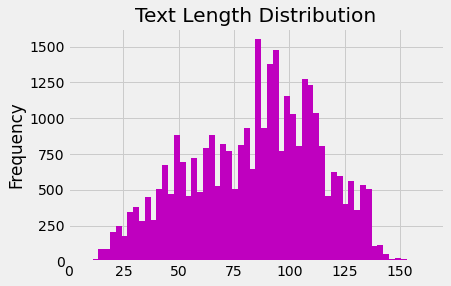

In [12]:
df["tweet_length"].plot(kind='hist', title='Text Length Distribution', xlim=[0, 170], bins = 100, figsize=(6,4),color='m')
plt.show()

**Note** : Distribution of text-length is between 5 and 150 where the most tweets-length are around 90 characters. It is also noticable that the number of tweets seem to be skewed.

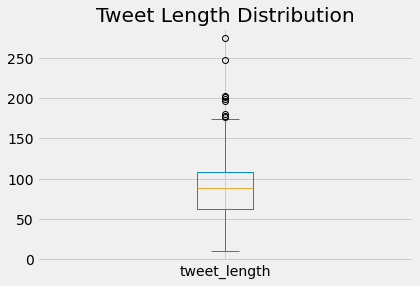

In [13]:
df["tweet_length"].plot(kind='box', title='Tweet Length Distribution', figsize=(6,4))
plt.show()

## Data Preprocessing

#### 1. Text Cleaning
- Lowercase
- Remove Punctuation
- Remove Urls
- Removing @tags
- Remove Special Characters

#### 2. Preprocessing Operations
- Tokenizing
- Removing Stop Words
- Lemmatization
- WordCloud

In [22]:
def clean_txt(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    Tweet = re.sub(regex_pat," ",tweet)
    
    #Remove @tags
    Tweet= re.sub(r'@[\w\-]+',"",Tweet)
    
    # removal of links[https://abc.com]
    url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    Tweet = re.sub(url_regex,"",Tweet)
    
    # split into words (tokenizing)
    Tweet = nltk.word_tokenize(Tweet)
    
    # convert to lower case
    Tweet = [w.lower() for w in Tweet]    
    
    # remove punctuation from each word
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    Tweet = [re_punc.sub('', w) for w in Tweet]

    # remove remaining tokens that are not alphabetic
    Tweet = [word for word in Tweet if word.isalpha()]

    # filter out stop words
    Tweet = [w for w in Tweet if w not in  stopwords] 
    
    # filter out short tokens
    Tweet = [word for word in Tweet if len(word) > 2]

    #Stemm all the words in the sentence
    lemmatizer = WordNetLemmatizer() 
    lem_words = [lemmatizer.lemmatize(word) for word in Tweet]
    combined_text = ' '.join(lem_words)
    return combined_text

# Cleaning the text data
df['cleaned_phrase'] = df['tweet'].apply(clean_txt)
df['cleaned_phrase'].sample(50)

id
4065                           day away tear fairy fairy ness kawaii mushroom eye watchingyou nature friendship
1331                                                      friday get excited treat one delicious bagel sandwich
9890                                                                     focusing truly want allow stay healthy
11409            stop bullying stop racism everyone stand say wrong treat everyone respect everydayheroes bully
13795                                         appletstag date love boyfriend couple lunch food dating delicious
2170                                                                         going backing choir tomorrow night
29327                                                                   one bro another enlist fall archive rva
23928                                                                                    looking wild sex funny
4616                                                                                                 